In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = 'Motor_Vehicle_Crashes_modified.csv'

In [4]:
motor_vehicle_df = pd.read_csv(file, encoding="ISO-8859-1")


In [5]:
motor_vehicle_df.head()
#motorvehicle_df.head()

,Year,Vehicle Body Type,Action Prior to Accident,Type / Axles of Truck or Bus,Vehicle Year,State of Registration,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Unnamed: 12
0,2016,SUBURBAN,Changing Lanes,Not Entered,2012.0,NY,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable,NaN
1,2016,PICKUP TRUCK,Going Straight Ahead,Not Entered,2014.0,NY,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,NaN
2,2016,4 DOOR SEDAN,Going Straight Ahead,Not Entered,2007.0,NY,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,NaN
3,2016,SUBURBAN,Going Straight Ahead,Not Entered,2011.0,NY,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,Unknown,NaN
4,2016,SUBURBAN,Going Straight Ahead,Not Entered,2004.0,NY,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable,"Snow Embankment, Collision With Fixed Object",NaN


In [6]:
del motor_vehicle_df['Unnamed: 12']
motor_vehicle_df.head()

,Year,Vehicle Body Type,Action Prior to Accident,Type / Axles of Truck or Bus,Vehicle Year,State of Registration,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type
0,2016,SUBURBAN,Changing Lanes,Not Entered,2012.0,NY,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable
1,2016,PICKUP TRUCK,Going Straight Ahead,Not Entered,2014.0,NY,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable
2,2016,4 DOOR SEDAN,Going Straight Ahead,Not Entered,2007.0,NY,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable
3,2016,SUBURBAN,Going Straight Ahead,Not Entered,2011.0,NY,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,Unknown
4,2016,SUBURBAN,Going Straight Ahead,Not Entered,2004.0,NY,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable,"Snow Embankment, Collision With Fixed Object"


In [7]:
motor_vehicle_df.count()
#motorvehicle_df.count()
#motor_vehicle_df['Vehicle Make'].value_counts()

Year                                 1048575
Vehicle Body Type                    1048575
Action Prior to Accident             1048575
Type / Axles of Truck or Bus         1048575
Vehicle Year                          890678
State of Registration                 965273
Vehicle Make                          891552
Contributing Factor 1                1048552
Contributing Factor 1 Description    1048552
Contributing Factor 2                1048553
Contributing Factor 2 Description    1048553
Event Type                           1028946
dtype: int64

In [8]:
motor_vehicle_df = motor_vehicle_df.dropna(how='any')

In [9]:
motor_vehicle_df.count()

Year                                 870343
Vehicle Body Type                    870343
Action Prior to Accident             870343
Type / Axles of Truck or Bus         870343
Vehicle Year                         870343
State of Registration                870343
Vehicle Make                         870343
Contributing Factor 1                870343
Contributing Factor 1 Description    870343
Contributing Factor 2                870343
Contributing Factor 2 Description    870343
Event Type                           870343
dtype: int64

In [10]:
#motor_vehicle_df['Vehicle Make'].replace('TYOYTA', 'TOYOTA', inplace = True)
motor_vehicle_df['Vehicle Make'] = motor_vehicle_df['Vehicle Make'].replace({'FRD':'FORD','NISSA': 'NISSAN','HYUND' :'HYUNDAI','SUBAR':'SUBARU'})



In [11]:
motor_vehicle_df['Vehicle Make'].value_counts()

TOYOT      101443
FORD        96623
HONDA       89126
CHEVR       86578
NISSAN      65892
DODGE       37912
HYUNDAI     35850
JEEP        34433
SUBARU      21591
CHRYS       17852
VOLKS       16665
KIA         16602
BMW         16503
GMC         16192
ME/BE       14619
LEXUS       12129
ACURA       11831
MAZDA       11322
BUICK       11166
PONTI       10721
LINCO        8541
MITSU        7758
AUDI         7533
INFIN        7510
CADIL        7230
SATUR        7083
MERCU        7044
VOLVO        5608
CHEV         5323
TOYT         5140
            ...  
GENER           1
TALB            1
VULC            1
RAIB            1
REDR            1
TR/MA           1
TRAVI           1
FLEM            1
PEQUE           1
BYD             1
MOTR            1
SATRU           1
WILKE           1
IN/TE           1
MCL             1
FL/BO           1
LINGY           1
STEUP           1
GNC             1
DIVEL           1
ROKET           1
GANN            1
HINE            1
CONQU           1
BNW       

In [12]:
factors1_df = motor_vehicle_df.loc[:,["Year","Contributing Factor 1 Description","Action Prior to Accident"]]
factor_year_df = factors1_df.rename(columns={"Contributing Factor 1 Description":"Factors",
                                                "Action Prior to Accident":"Prior_Reasons"})
factor_year_df.head()

,Year,Factors,Prior_Reasons
0,2016,Unsafe Lane Changing,Changing Lanes
1,2016,Pavement Slippery,Going Straight Ahead
2,2016,Pavement Slippery,Going Straight Ahead
3,2016,Pavement Slippery,Going Straight Ahead
4,2016,Pavement Slippery,Going Straight Ahead


In [13]:
grouped_factor_df = factor_year_df.groupby(["Factors","Prior_Reasons"])
factors_count = grouped_factor_df["Year"].count()
# reasons_count = grouped_factor_df["Prior_Reasons"].count()

factors_df = pd.DataFrame({"Count of Crashes" : factors_count})
factors_df = factors_df.reset_index()
factors_df.head()
# factors_df["Count of Crashes"]


,Factors,Prior_Reasons,Count of Crashes
0,Accelerator Defective,Avoiding Object in Roadway,1
1,Accelerator Defective,Backing,19
2,Accelerator Defective,Changing Lanes,1
3,Accelerator Defective,Entering Parked Position,13
4,Accelerator Defective,Going Straight Ahead,110


In [14]:
Topfactors_df = factors_df[factors_df['Factors'].str.contains("Following Too Closely")]
sort_values = Topfactors_df.sort_values(['Count of Crashes'], ascending=False)
Topfactors1_df = sort_values.head()
print(Topfactors1_df)

                   Factors         Prior_Reasons  Count of Crashes
280  Following Too Closely  Going Straight Ahead             26498
291  Following Too Closely   Slowing or Stopping              9760
293  Following Too Closely   Starting in Traffic              1417
278  Following Too Closely        Changing Lanes               588
282  Following Too Closely     Making Right Turn               311


<IPython.core.display.Javascript object>


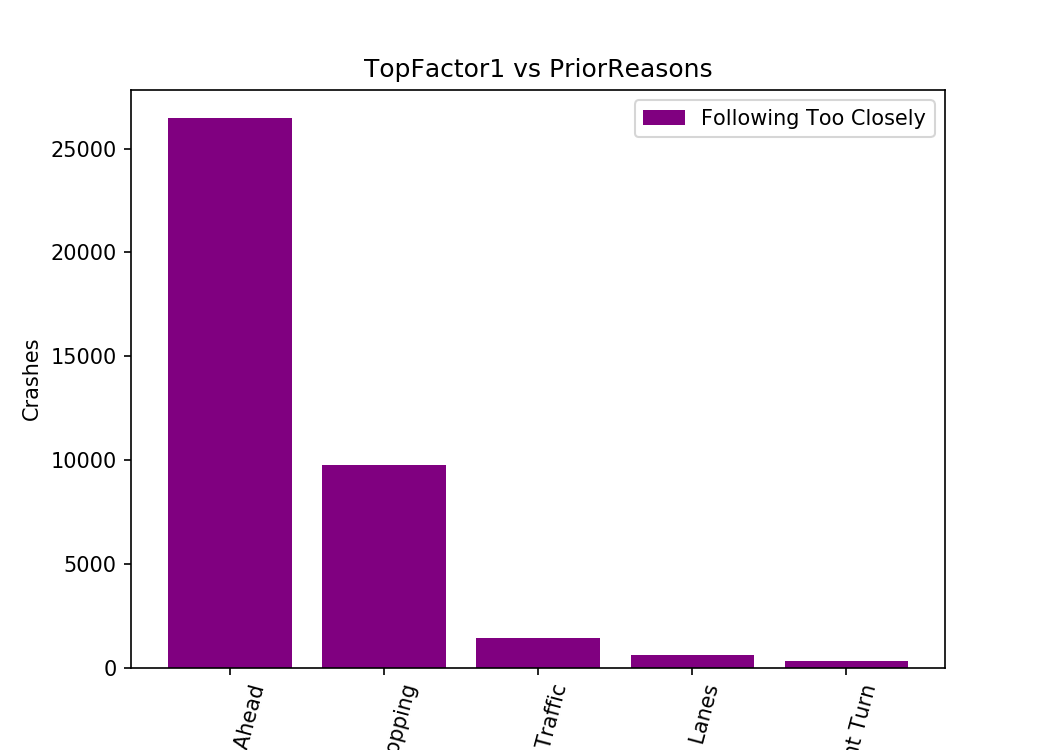

In [15]:
plt.figure(figsize=(7,5))
xaxis = np.arange(len(Topfactors1_df))
tick_locations = [value+0.4 for value in xaxis]


yaxis = Topfactors1_df["Count of Crashes"]
plt.bar(xaxis,yaxis, color="purple", align="edge",label = 'Following Too Closely')
plt.legend(loc='upper right')
plt.xticks(tick_locations, Topfactors1_df["Prior_Reasons"], rotation="75")
plt.title("TopFactor1 vs PriorReasons")
plt.xlabel("PriorReasons")
plt.ylabel("Crashes")
plt.show()

In [16]:
plt.savefig("C:/Users/hello/OneDrive/Desktop/Rutgers-project1/Images/Topfactors1.png")
plt.show()

In [17]:
Topfactors_df = factors_df[factors_df['Factors'].str.contains("Failure to Yield")]
sort_values = Topfactors_df.sort_values(['Count of Crashes'], ascending=False)
Topfactors2_df = sort_values.head()
print(Topfactors2_df)

                           Factors         Prior_Reasons  Count of Crashes
230  Failure to Yield Right-of-Way      Making Left Turn             17473
229  Failure to Yield Right-of-Way  Going Straight Ahead              9343
232  Failure to Yield Right-of-Way     Making Right Turn              2907
243  Failure to Yield Right-of-Way   Starting in Traffic              1727
227  Failure to Yield Right-of-Way        Changing Lanes              1046


<IPython.core.display.Javascript object>


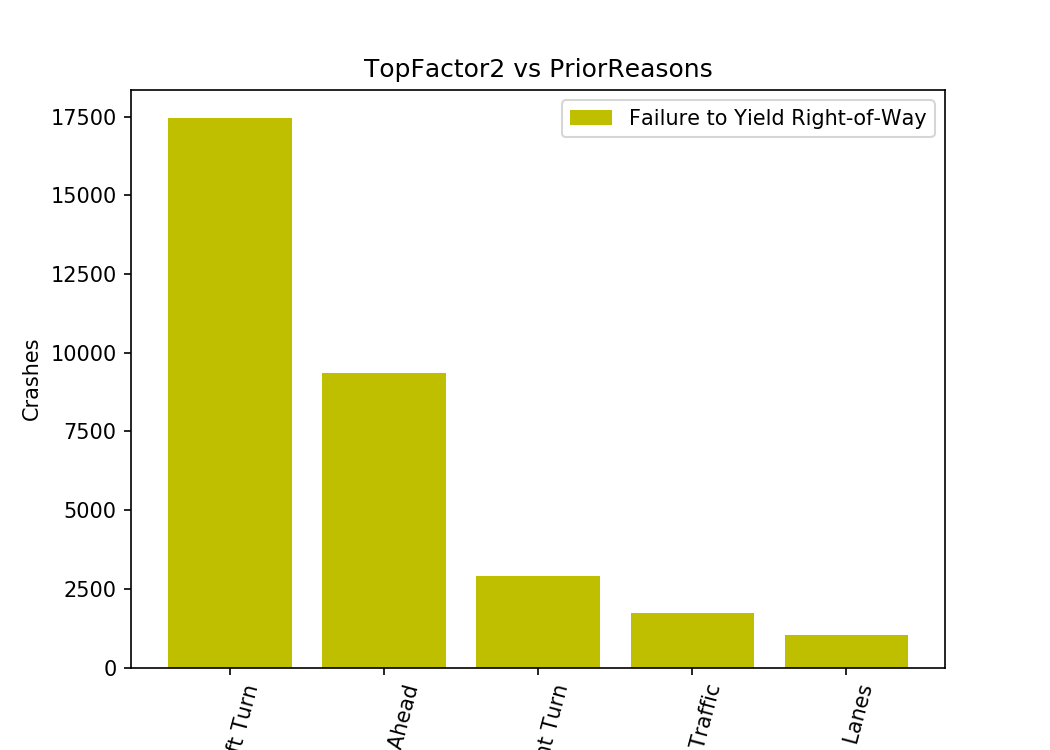

In [18]:
plt.figure(figsize=(7,5))
xaxis = np.arange(len(Topfactors2_df))
tick_locations = [value+0.4 for value in xaxis]


yaxis = Topfactors2_df["Count of Crashes"]
plt.bar(xaxis,yaxis, color="y", align="edge",label = 'Failure to Yield Right-of-Way')
plt.legend(loc='upper right')

plt.xticks(tick_locations, Topfactors2_df["Prior_Reasons"], rotation="75")
plt.title("TopFactor2 vs PriorReasons")
plt.xlabel("PriorReasons")
plt.ylabel("Crashes")
plt.show()

In [19]:
plt.savefig("C:/Users/hello/OneDrive/Desktop/Rutgers-project1/Images/Topfactors2.png")
plt.show()

In [20]:
Topfactors_df = factors_df[factors_df['Factors'].str.contains("Distraction")]
sort_values = Topfactors_df.sort_values(['Count of Crashes'], ascending=False)
Topfactors3_df = sort_values.head()
print(Topfactors3_df)

                             Factors         Prior_Reasons  Count of Crashes
132  Driver Inattention/Distraction*  Going Straight Ahead             29947
133  Driver Inattention/Distraction*      Making Left Turn              5856
144  Driver Inattention/Distraction*   Slowing or Stopping              3341
135  Driver Inattention/Distraction*     Making Right Turn              2273
146  Driver Inattention/Distraction*   Starting in Traffic              2064


<IPython.core.display.Javascript object>


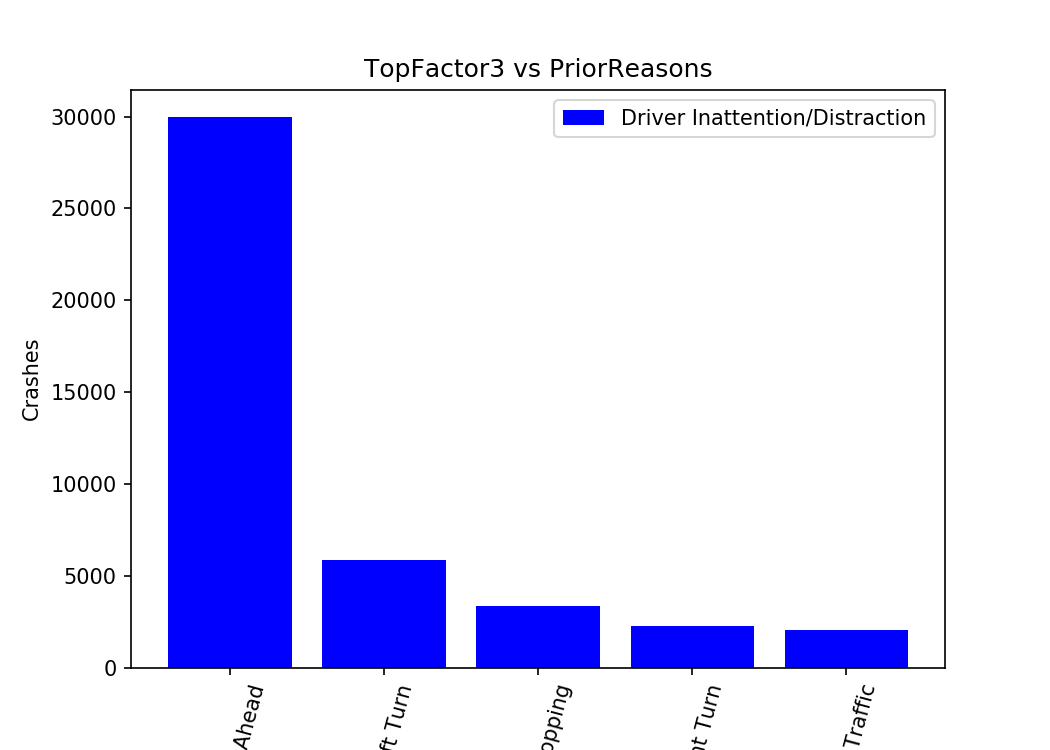

In [21]:
plt.figure(figsize=(7,5))
xaxis = np.arange(len(Topfactors3_df))
tick_locations = [value+0.4 for value in xaxis]


yaxis = Topfactors3_df["Count of Crashes"]
plt.bar(xaxis,yaxis, color="blue", align="edge",label = 'Driver Inattention/Distraction')
plt.legend(loc='upper right')

plt.xticks(tick_locations, Topfactors3_df["Prior_Reasons"], rotation="75")
plt.title("TopFactor3 vs PriorReasons")
plt.xlabel("PriorReasons")
plt.ylabel("Crashes")
plt.show()

In [22]:
plt.savefig("C:/Users/hello/OneDrive/Desktop/Rutgers-project1/Images/Topfactors3.png")
plt.show()

In [23]:
Topfactors_df = factors_df[factors_df['Factors'].str.contains("Animal")]
sort_values = Topfactors_df.sort_values(['Count of Crashes'], ascending=False)
Topfactors4_df = sort_values.head()
print(Topfactors4_df)

            Factors               Prior_Reasons  Count of Crashes
56  Animal's Action        Going Straight Ahead             20389
52  Animal's Action  Avoiding Object in Roadway               422
65  Animal's Action         Slowing or Stopping               103
57  Animal's Action            Making Left Turn                22
58  Animal's Action           Making Right Turn                15


<IPython.core.display.Javascript object>


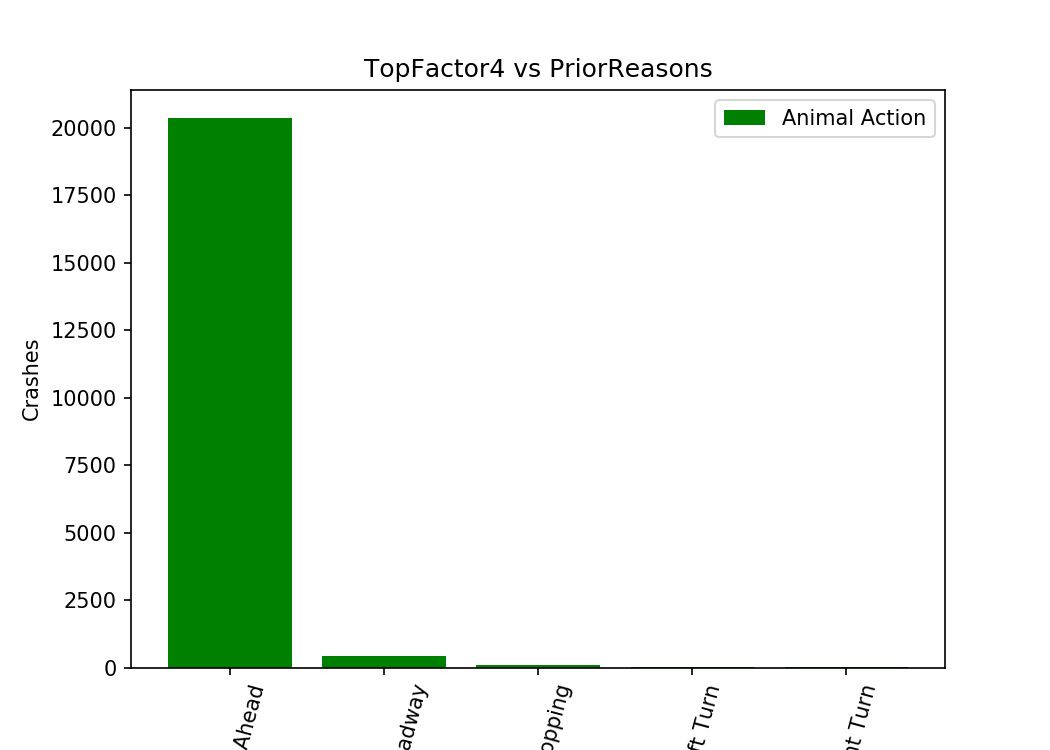

In [24]:
plt.figure(figsize=(7,5))
xaxis = np.arange(len(Topfactors4_df))
tick_locations = [value+0.4 for value in xaxis]


yaxis = Topfactors4_df["Count of Crashes"]
plt.bar(xaxis,yaxis, color="green", align="edge",label = 'Animal Action')
plt.legend(loc='upper right')

plt.xticks(tick_locations, Topfactors4_df["Prior_Reasons"],rotation="75")
plt.title("TopFactor4 vs PriorReasons")
plt.xlabel("PriorReasons")
plt.ylabel("Crashes")
plt.show()

In [25]:
plt.savefig("C:/Users/hello/OneDrive/Desktop/Rutgers-project1/Images/Topfactors4.png")
plt.show()

In [26]:
Topfactors_df = factors_df[factors_df['Factors'].str.contains("Unsafe Speed")]
sort_values = Topfactors_df.sort_values(['Count of Crashes'], ascending=False)
Topfactors5_df = sort_values.head()
print(Topfactors5_df)

          Factors         Prior_Reasons  Count of Crashes
818  Unsafe Speed  Going Straight Ahead             23977
830  Unsafe Speed   Slowing or Stopping              1561
821  Unsafe Speed     Making Right Turn               886
816  Unsafe Speed        Changing Lanes               828
819  Unsafe Speed      Making Left Turn               556


<IPython.core.display.Javascript object>


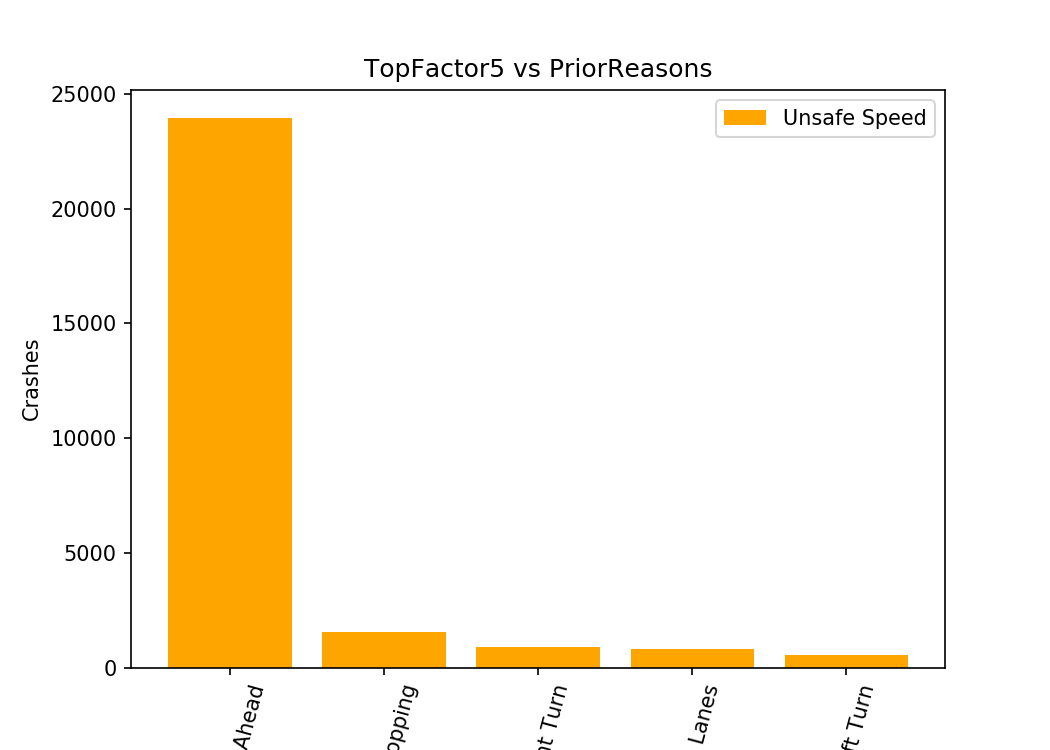

In [27]:
plt.figure(figsize=(7,5))
xaxis = np.arange(len(Topfactors5_df))
tick_locations = [value+0.4 for value in xaxis]


yaxis = Topfactors5_df["Count of Crashes"]
plt.bar(xaxis,yaxis, color="orange", align="edge",label = 'Unsafe Speed')
plt.legend(loc='upper right')

plt.xticks(tick_locations, Topfactors5_df["Prior_Reasons"], rotation="75")
plt.title("TopFactor5 vs PriorReasons")
plt.xlabel("PriorReasons")
plt.ylabel("Crashes")
plt.show()

In [28]:
plt.savefig("C:/Users/hello/OneDrive/Desktop/Rutgers-project1/Images/Topfactors5.png")
plt.show()